# Espectros

En este cuaderno usaremos listas de tuplas para representar espectros.

Cada una de las tuplas tendrá la forma (frec,ampl,fase) de una componente cosenoidal.

En este cuaderno veremos cómo

* Representar el espectro

* Sintetizar la señal correspondiente en el dominio del tiempo.

In [1]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math

import warnings
warnings.filterwarnings('ignore')

import UPVlog
nombre_cuaderno='P2-1-Espectros'

mylogger=UPVlog.UPVlog(nombre_cuaderno)

## Representación del espectro
En primer lugar veremos cómo representar el espectro en una gráfica de rayas.


In [2]:
# Completar el valor de las variables que están asignadas a None

def plot_espectro_amplitud(espectro):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)

    La función dibuja el espectro de rayas
    '''

    ncompo = None
    amplitudes = None
    frecuencias = None
    
    ### BEGIN SOLUTION
    # Esto se lo hacemos en clase para que el que venga lo tenga bien
    
    ncompo = len(espectro)
    amplitudes = np.zeros(ncompo)
    frecuencias = np.zeros(ncompo)

    for k in range(ncompo):
        amplitudes[k] = espectro[k][1]
        frecuencias[k] = espectro[k][0]

    ### END SOLUTION
    
    amplitudes=np.absolute(amplitudes)
    _=plt.stem(frecuencias,np.abs(amplitudes), markerfmt=" ")
    _=plt.title('Espectro de amplitud')
    _=plt.xlabel('frecuencia')
    _=plt.xlim([-0.1*np.max(frecuencias),1.2*np.max(frecuencias)]) 
    _=plt.grid()

    return ncompo,amplitudes,frecuencias

### Prueba de la función

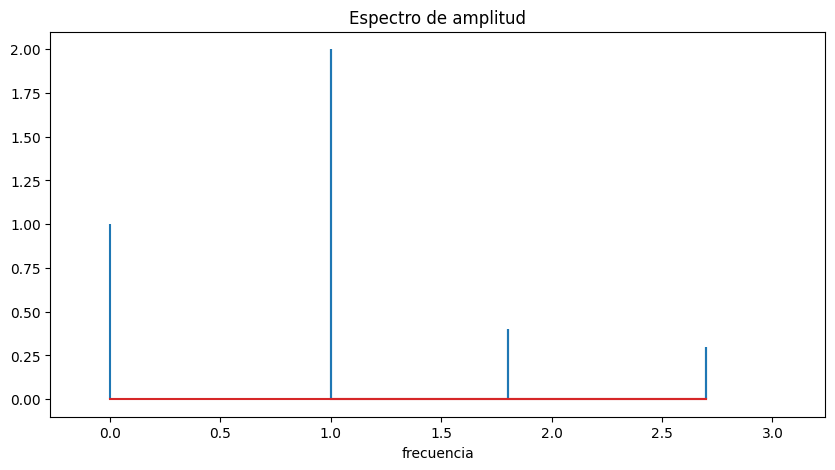

In [3]:
# Ponemos unos valores cualquiera de frecuencia , amplitudes  y fases
mylogger.log("Testing plot_espectro_amplitud()")
espectro =[ (0,1,0), (1,2,math.pi/3), (1.8,0.4,0), (2.7,0.3,-0.256*math.pi)]
### BEGIN TESTS
ncompo,amplitudes,frecuencias = plot_espectro_amplitud(espectro)
assert ncompo is not None, "Función plot_espectro_amplitud() no implementada"
assert ncompo ==4, "Función plot_espectro_amplitud() incorrecta"
assert np.all(amplitudes ==np.array([1,2,0.4,0.3])),"Función plot_espectro_amplitud() incorrecta"
### END TESTS
### BEGIN HIDDEN TESTS
ncompo2,amplitudes2,frecuencias2 = plot_espectro_amplitud(espectro[1:])
assert ncompo2 ==3
assert np.all(amplitudes2 ==np.array([2,0.4,0.3])),"Función plot_espectro_amplitud() incorrecta"
assert np.all(frecuencias2 ==np.array([1,1.8,2.7])),"Función plot_espectro_amplitud() incorrecta"
### END HIDDEN TESTS

mylogger.log("Success Testing plot_espectro_amplitud()")

## Síntesis de señal a partir del espectro

Tenemos que hacer una función que genere una matriz 

* Con tantas columnas como componentes espectrales. Cada columna será una de las sinusoides.

* Con tantas filas como instantes

* La forma trigonométrica básica será el **coseno** es decir la componente k-ésima $( f_k, A_k, \phi _ k)$ se corresponde on la señal

$$ A_k \, \mathbf{\cos}\,  2 \pi \, f_k \, t + \phi _k $$

Para calcular la señal suma simplemente haremos una suma por filas.



In [4]:
def creaComponentes(espectro,t):
    '''
    espectro: lista de tuplas de 3 elementos (frec,ampl,fase)
    t: Instantes de tiempo
    
    Devuelve un array de numpy con tantas columnas como elementos tenga el espectro
    Cada una de ellas es una componente frecuencial
    
    La señal suma se puede obtener haciendo np.sum(out,axis=1)
    '''
    
    # La señal suma se puede obtener haciendo np.sum(,axis=1)
    
      
    ncomponentes = len(espectro)
    ninstantes = len(t)
    out=np.zeros((ninstantes,ncomponentes))

    # Completar los valores de out
    ### BEGIN SOLUTION
    # La hacen ellos en clase en aprox 5 minutos
    for k in range(ncomponentes):
        frecuencia = espectro[k][0]
        amplitud = espectro[k][1]
        fase = espectro[k][2]      
        out [:,k]= amplitud * np.cos(2*math.pi*frecuencia*t + fase)
    ### END SOLUTION        
    return out

### Prueba de la función

In [5]:
# Emplearemos el mismo espectro de la señal anterior
t=np.linspace(0,5,1000)
espectro =[ (0,1,0), (1,2,math.pi/3), (1.8,0.4,0), (2.7,0.3,-0.256*math.pi)]

mylogger.log("Testing creaComponentes()")
sinusoides=creaComponentes(espectro,t)

# El valor debe ser 0.4
print("sinusoides[0,2]=", sinusoides[0,2], " debe ser ", 0.4)
### BEGIN TESTS
assert np.max(np.abs(sinusoides))>0, "Función no implementada"
assert np.max(np.abs(sinusoides[:,2]))-0.4<0.00001, "Función errónea"
assert np.max(np.abs(sinusoides[:,0]))- np.min(np.abs(sinusoides[:,0])) == 0, "Función errónea"
n1=np.sum( (np.diff((sinusoides[:,1]>0).astype(np.float32))>0).astype(np.float32))
n2=np.sum( (np.diff((sinusoides[:,2]>0).astype(np.float32))>0).astype(np.float32))
assert n1 < n2 , "Función errónea"
assert np.isclose(sinusoides[0,2] ,0.4), "Función errónea. Ha empleado senos o cosenos?"
### END TESTS

### BEGIN HIDDEN TESTS
espectro2 = espectro[1:]
t2=np.linspace(0,10,2500)
### AUTOTEST creaComponentes(espectro2,t2)
### END HIDDEN TESTS

mylogger.log("Success Testing creaComponentes()")

sinusoides[0,2]= 0.4  debe ser  0.4


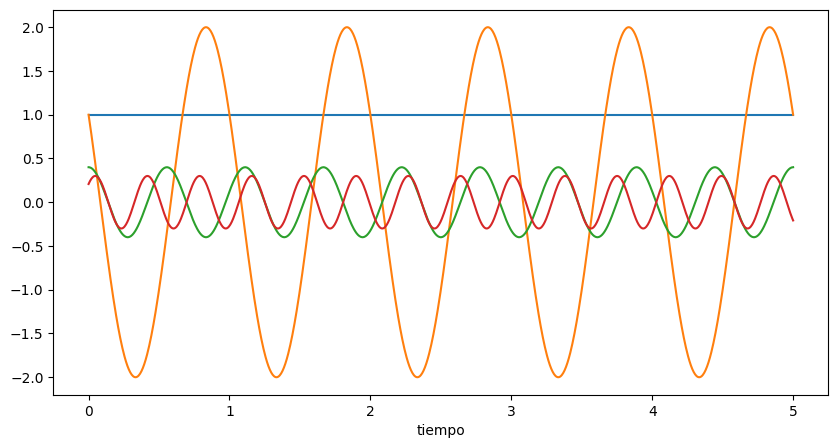

In [6]:
# Podemos representar en una misma gráfica cada una de las componentes

_=plt.plot(t,sinusoides)
_=plt.xlabel('tiempo')

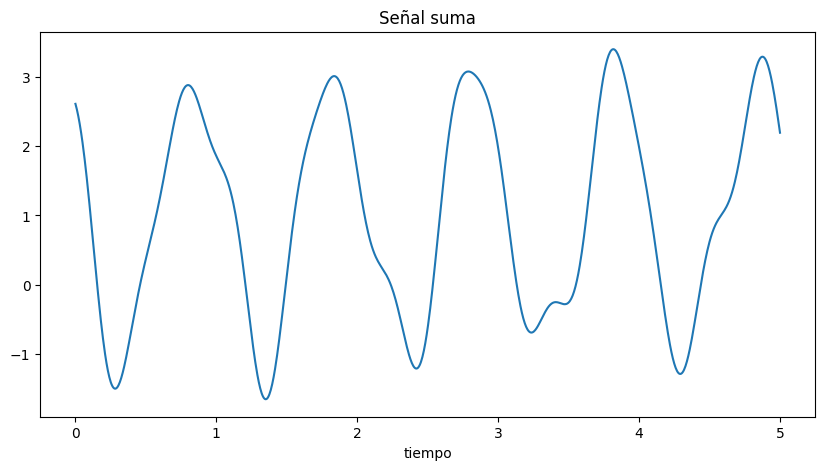

In [7]:
# La señal temporal correspondiente al espectro será la suma de todos esas componentes
x=np.sum(sinusoides,axis=1)
_=plt.plot(t,x)
_=plt.xlabel('tiempo')
_=plt.title('Señal suma')

Se observa que es una señal con una forma *extraña*. Sin embargo su descripción en términos de frecuencia es muy sencilla. Es la suma de 4 términos espectrales:

In [8]:
espectro

[(0, 1, 0),
 (1, 2, 1.0471975511965976),
 (1.8, 0.4, 0),
 (2.7, 0.3, -0.8042477193189871)]